<!--NAVIGATION-->
| [Conteúdo](Index.ipynb) | [Frequentist Inference] >

<a href="https://colab.research.google.com/github/fmafonseca/casi/blob/master/notebooks/01.01.Algorithms-and-Inference.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Algorithms and Inference

***
>*Statistics is the science of learning from experience, particularly experience that arrives a little bit at a time: the successes and failures of a new experimental drug, the uncertain measurements of an asteroid’s path toward Earth.*
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>

>*First, however, we want to discuss a less philosophical, more operational division of labor that applies to both theories: between the <font color=magenta>algorithmic</font> and <font color=magenta>inferential</font> aspects of statistical analysis.*
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>

>"*Very broadly speaking, <font color=magenta>algorithms</font> are what statisticians do while <font color=magenta>inference</font> says why they do them. A particularly energetic brand of the statistical enterprise has flourished in the new century, data science, emphasizing <font color=magenta>algorithmic thinking</font> rather than <strong><font color=magenta>its inferential justification</font></strong>.*"
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>

>*Here <font color=magenta>averaging is the algorithm</font>, while the <font color=magenta>standard error provides an inference of the algorithm’s accuracy</font>. It is a surprising, and crucial, aspect of statistical theory that the same data that supplies an estimate can also assess its accuracy*
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>

>*The point is that the <font color=magenta>algorithm</font> comes first and the <font color=magenta>inference</font> follows at a second level of statistical consideration.*
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
***

Suponha que você tenha em mãos uma **<font color=gray>amostra aleatória</font>** (***<font color=gray>random sample</font>***) $x = \{ x_1, x_2, \ldots, x_n \}$ de tamanho $n$ que foi coletada de alguma **<font color=orange>população</font>** (***<font color=orange>population</font>***) e que estes valores $x_1, x_2, \ldots, x_n$ se aplicam a algum fenômeno do seu interesse (digamos, a quantidade de alunos matriculados no ensino fundamental em $n$ municípios do estado de Minas Gerais).

Você precisa de uma estimativa para a <font color=orange>média</font> ($\mu$) da **<font color=orange>população</font>** (***<font color=orange>population</font>***). Com a **<font color=gray>amostra aleatória</font>** (***<font color=gray>random sample size</font>***) $x = \{ x_1, x_2, \ldots, x_n \}$ em mãos, a melhor estimativa que você pode ter para a <font color=orange>média</font> ($\mu$) da **<font color=orange>população</font>** (***<font color=orange>population</font>***) é a <font color=gray>média</font> ($\bar{x}$) desta **<font color=gray>amostra aleatória</font>** (***<font color=gray>random sample size</font>***).

Aqui, o nosso **<font color=magenta>algoritmo</font>** para calcular a melhor estimativa para o parâmetro de interesse é a **média aritmética**:

$$
\bar{x} = \sum_{i=1}^n \frac{x_i}{n}
$$

Mas qual a **incerteza** (***uncertanty***) em relação a esta estimativa? Em outras palavras, o quão **preciso** é este número $\bar{x}$?

De acordo com o **Teorema Central do Limite** (***Central Limit Theorem - CLT***), <mark>sob certas condições</mark> ([mais detalhes aqui](https://fmafonseca.github.io/statistical-thinking-data-science/001.teorema-central-do-limite.html)), a distribuição das **<font color=blue>médias das amostras</font>** (***<font color=blue>sample means</font>***) $\bar{X}$ é **aproximadamente normal** (***nearly normal***), centrada na <font color=orange>média da população</font> (*<font color=orange>population mean</font>*) $\mu$, e com um <font color=blue>desvio padrão</font> (*<font color=blue>standard deviation</font>*) $SE$ igual ao <font color=orange>desvio padrão da população</font> (*<font color=orange>population standard deviation</font>*) $\sigma$ dividido pela raiz quadrada do <font color=gray>tamanho das amostras</font> (*<font color=gray>samples size</font>*) $n$.

$$
\bar{X} \sim N\left(mean=\mu, SE=\frac{\sigma}{\sqrt{n}}\right)
$$

Então, o <font color=blue>desvio padrão</font> (*<font color=blue>standard deviation</font>*) $SE = \frac{\sigma}{\sqrt{n}}$ desta distribuição das <font color=blue>médias das amostras</font> (*<font color=blue>sample means</font>*) $\bar{X}$ é, na verdade, uma **medida do erro** da nossa estimativa $\bar{x}$ e, portanto, $SE$ fornece uma **<font color=magenta>inferência</font>** a respeito da **precisão** do nosso **<font color=magenta>algoritmo</font>** (a média aritmética). Por este motivo, o <font color=blue>desvio padrão</font> (*<font color=blue>standard deviation</font>*) $SE$ desta distribuição das <font color=blue>medias das amostras</font> (*<font color=blue>sample means</font>*) $\bar{X}$ é denominado de **erro padrão** (***standard error***).

No entanto, tipicamente, não conhecemos o <font color=orange>desvio padrão da população</font> (*<font color=orange>population standard deviation</font>*) $\sigma$, porém, podemos estimá-lo através do <font color=gray>desvio padrão da amostra</font> (*<font color=gray>sample standard deviation</font>*) $s$. Logo, 

$$
SE \approx \hat{se} = \frac{s}{\sqrt{n}}
$$

Então, ao invés de reportar somente a estimativa $\bar{x}$, podemos reportar alguma incerteza sobre esta estimativa através de $\bar{x} \pm \hat{se}$.

In [1]:
from scipy import stats as st
import numpy as np

def make_random_samples_and_estimations(start_size, end_size, increment_size):
    random_sample_sizes = []
    estimated_means = []
    estimated_standard_errors = []

    for random_sample_size in range(start_size,end_size,increment_size):
        random_sample = pop_distribution.rvs(size=random_sample_size)
        estimated_mean = np.mean(random_sample)
        estimated_standard_error = np.std(random_sample) / np.sqrt(random_sample_size)

        random_sample_sizes.append(random_sample_size)
        estimated_means.append(estimated_mean)
        estimated_standard_errors.append(estimated_standard_error)
        
    return random_sample_sizes, estimated_means, estimated_standard_errors

In [2]:
# definition of the population distribution
pop_par_mu = 0
pop_par_sd = 1
pop_distribution = st.norm(loc=pop_par_mu, scale=pop_par_sd)

random_sample_sizes = []
estimated_means = []
estimated_standard_errors = []

sizes, means, SEs = make_random_samples_and_estimations(10,100,20)
random_sample_sizes.extend(sizes)
estimated_means.extend(means)
estimated_standard_errors.extend(SEs)

sizes, means, SEs = make_random_samples_and_estimations(100,1000,100)
random_sample_sizes.extend(sizes)
estimated_means.extend(means)
estimated_standard_errors.extend(SEs)

sizes, means, SEs = make_random_samples_and_estimations(1000,10000,1000)
random_sample_sizes.extend(sizes)
estimated_means.extend(means)
estimated_standard_errors.extend(SEs)

sizes, means, SEs = make_random_samples_and_estimations(10000,100000,10000)
random_sample_sizes.extend(sizes)
estimated_means.extend(means)
estimated_standard_errors.extend(SEs)

In [3]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook') # for the notebook only (not for JupyterLab) run this command once per session

def plot_truemean_estimatedmean_SE(true_mean, estimated_means, estimated_standard_errors, random_sample_sizes):
    data = pd.DataFrame({
        'true_mean': true_mean, 'random_sample_size': random_sample_sizes, 
        'estimated_mean': estimated_means, 'estimated_se': estimated_standard_errors
    })
    
    true_mean_plot = alt.Chart(data).mark_rule(color='red').encode(
        y='true_mean:Q',
        size=alt.value(1)
    )
    
    estimated_mean_plot = alt.Chart(data).mark_line().encode(
        x='random_sample_size:O',
        y='estimated_mean'
    )
    
    standard_error_plot = alt.Chart(data).mark_area(opacity=0.3).encode(
        x='random_sample_size:O',
        y='mu_hat_sup:Q',
        y2='mu_hat_inf:Q'
    ).transform_calculate(
        mu_hat_sup='datum.estimated_mean + datum.estimated_se',
        mu_hat_inf='datum.estimated_mean - datum.estimated_se',
    )
      
    chart = (true_mean_plot + estimated_mean_plot + standard_error_plot).properties(title='(est_mean +- se)  |  (true_mean)')
    return chart

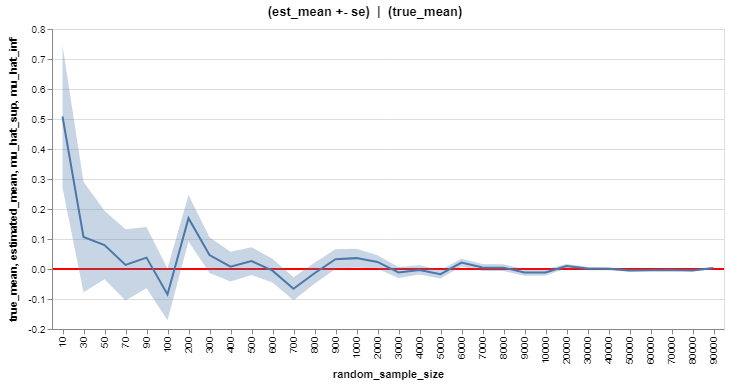

In [4]:
plot_truemean_estimatedmean_SE(pop_par_mu, estimated_means, estimated_standard_errors, random_sample_sizes)

## A Regression Example

In [5]:
kidney_df = pd.read_csv("data/kidney.txt", delimiter=' ')
kidney_df.head()

,age,tot
0,18,2.44
1,19,3.86
2,19,-1.22
3,20,2.30
4,21,0.98


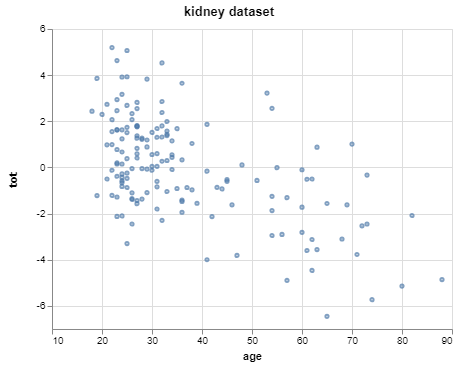

In [6]:
# scatter plot of dataset
kidney_df_plot = alt.Chart(kidney_df).mark_point().encode(
    alt.X('age:Q', scale=alt.Scale(zero=False)),
    y='tot:Q',
    size=alt.value(10)
).properties(title="kidney dataset")

kidney_df_plot

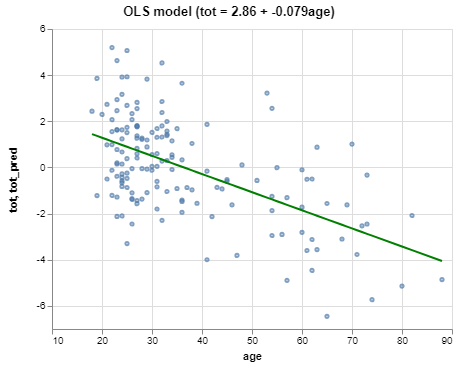

In [7]:
import statsmodels.formula.api as smf

# fit linear model
kidney_ols_model = smf.ols(formula='tot ~ age', data=kidney_df).fit()
# predict dataset
kidney_ols_model_tot_pred = kidney_ols_model.predict(kidney_df['age'])

# line plot that represents the linear model
kidney_ols_model_data = pd.DataFrame({'age': kidney_df['age'], 'tot_pred': kidney_ols_model_tot_pred})
kidney_ols_model_plot = alt.Chart(kidney_ols_model_data).mark_line(color="green").encode(x='age', y='tot_pred')

# dataset + model plots
kidney_ols_model_plot_title = "OLS model (tot = {0:.2f} + {1:.3f}age)".format(
    kidney_ols_model.params[0], kidney_ols_model.params[1]
)

plot = (kidney_df_plot + kidney_ols_model_plot).properties(
    title=kidney_ols_model_plot_title
)
plot

In [8]:
def calculate_regression_SEs(kidney_ols_model, ages, s, n, mean_ages, var_ages):
    tots_prev = []
    SEs = []
    for age in ages:
        tot_prev = kidney_ols_model.predict({'age':age})
        tots_prev.append(tot_prev[0])

        SE = (s / np.sqrt(n)) * np.sqrt(1 + ((age - mean_ages)**2)/var_ages)
        SEs.append(SE)
        
    return tots_prev, SEs

In [9]:
mean_ages = np.mean(kidney_df['age'])
var_ages = np.var(kidney_df['age'])
n = len(kidney_df.index)

# "standard error of the model" or "standard error of the regression"
s = np.std(kidney_ols_model.resid, ddof=1) * np.sqrt((n-1)/(n-2))

some_ages = [20, 30, 40, 50, 60, 70, 80]

kidney_ols_model_tots_prev, kidney_ols_model_SEs = calculate_regression_SEs(
    kidney_ols_model, some_ages, s, n, mean_ages, var_ages
)

table_1_1 = pd.DataFrame({
    'ages':some_ages, 
    'linear reg. predic.':np.round(kidney_ols_model_tots_prev, decimals=2),
    'linear reg. std error':np.round(kidney_ols_model_SEs, decimals=2)
})
table_1_1

,ages,linear reg. predic.,linear reg. std error
0,20,1.29,0.21
1,30,0.50,0.15
2,40,-0.28,0.15
3,50,-1.07,0.19
4,60,-1.86,0.26
5,70,-2.64,0.34
6,80,-3.43,0.42


In [10]:
def make_CIs_bar_plot(ages, tots_prev, SEs):
    cis_bar_data = pd.DataFrame({
        'age': ages,
        'ci_bar_lb': [(tot_prev - 2*se) for tot_prev, se in zip(tots_prev, SEs)],
        'ci_bar_ub': [(tot_prev + 2*se) for tot_prev, se in zip(tots_prev, SEs)]
    })

    cis_bar_plot = alt.Chart(cis_bar_data).mark_rule(color='red').encode(
        y='ci_bar_lb:Q', y2='ci_bar_ub:Q', x='age:Q', size=alt.value(1)
    )
    
    return cis_bar_plot

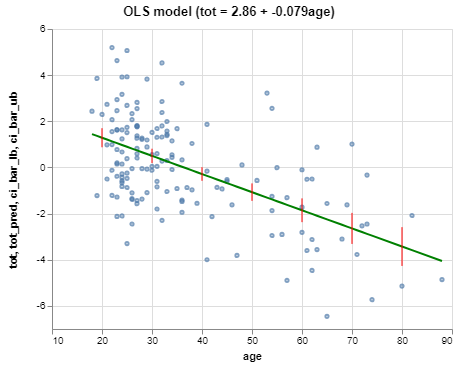

In [11]:
kidney_ols_model_cis_bar_plot = make_CIs_bar_plot(some_ages, kidney_ols_model_tots_prev, kidney_ols_model_SEs)

# dataset + model + cis plots   
plot = (kidney_df_plot + kidney_ols_model_plot + kidney_ols_model_cis_bar_plot).properties(
    title=kidney_ols_model_plot_title
)
plot

In [12]:
def make_CIs_line_plot(ages, tots_prev, SEs):
    cis_line_data = pd.DataFrame({
        'age': ages,
        'ci_ln_lb': [(tot_prev - 2*se) for tot_prev, se in zip(tots_prev, SEs)],
        'ci_ln_ub': [(tot_prev + 2*se) for tot_prev, se in zip(tots_prev, SEs)]
    })

    cis_line_lb_plot = alt.Chart(cis_line_data).mark_line(color='red').encode(
        y='ci_ln_lb:Q', x='age:Q'
    )
    cis_line_ub_plot = alt.Chart(cis_line_data).mark_line(color='red').encode(
        y='ci_ln_ub:Q', x='age:Q'
    )
    
    return cis_line_lb_plot + cis_line_ub_plot

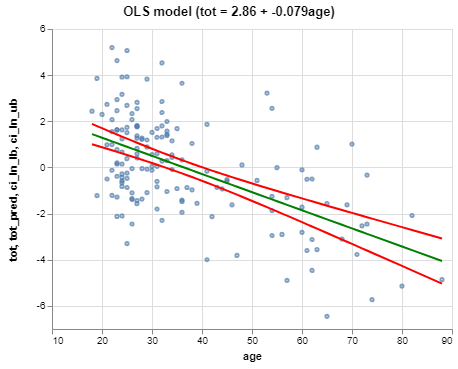

In [13]:
kidney_ols_model_tots_prev, kidney_ols_model_SEs = calculate_regression_SEs(
    kidney_ols_model, kidney_df['age'], s, n, mean_ages, var_ages
)

kidney_ols_model_cis_line_plot = make_CIs_line_plot(
    kidney_df['age'], kidney_ols_model_tots_prev, kidney_ols_model_SEs
)

# dataset + model + cis plots   
plot = (kidney_df_plot + kidney_ols_model_plot + kidney_ols_model_cis_line_plot).properties(
    title=kidney_ols_model_plot_title
)
plot

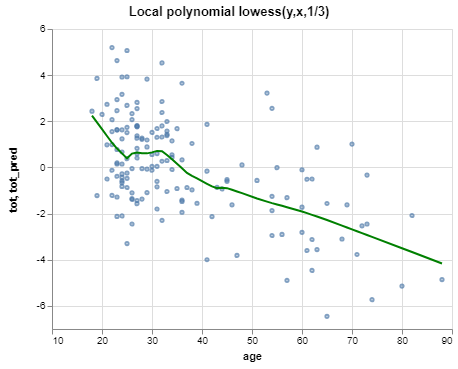

In [14]:
from scipy.interpolate import interp1d
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

kidney_lowess_model = lowess(kidney_df['tot'], kidney_df['age'], frac=1./3)
kidney_lowess_model_x = list(zip(*kidney_lowess_model))[0]
kidney_lowess_model_y = list(zip(*kidney_lowess_model))[1]
kidney_lowess_model_f = interp1d(kidney_lowess_model_x, kidney_lowess_model_y, bounds_error=False)

kidney_lowess_model_tots_prev = kidney_lowess_model_y

# curve plot that represents the lowess model
kidney_lowess_model_data = pd.DataFrame({'age': kidney_df['age'], 'tot_pred': kidney_lowess_model_tots_prev})
kidney_lowess_model_plot = alt.Chart(kidney_lowess_model_data).mark_line(color="green").encode(x='age', y='tot_pred')

# dataset + model plots
kidney_lowess_model_plot_title = "Local polynomial lowess(y,x,1/3)"
plot = (kidney_df_plot + kidney_lowess_model_plot).properties(
    title=kidney_lowess_model_plot_title
)
plot

In [15]:
replications = 250
kidney_lowess_model_bootstrap_df = pd.DataFrame(columns=['replication', 'age', 'tot_pred'])
for rep in range(replications):
    bootstrap_idxs = np.random.choice(n, n)
    new_kidney_df = kidney_df.iloc[bootstrap_idxs]
    new_kidney_df = new_kidney_df.sort_values(by=['age'])
    
    #tot_pred = lowess(new_kidney_df['tot'], new_kidney_df['age'], frac=1./3, return_sorted=False)
    
    new_kidney_lowess_model = lowess(new_kidney_df['tot'], new_kidney_df['age'], frac=1./3)
    new_kidney_lowess_model_x = list(zip(*new_kidney_lowess_model))[0]
    new_kidney_lowess_model_y = list(zip(*new_kidney_lowess_model))[1]
    new_kidney_lowess_model_f = interp1d(new_kidney_lowess_model_x, new_kidney_lowess_model_y, bounds_error=False)
    
    tot_pred = new_kidney_lowess_model_y
    df_row = pd.DataFrame({
        'replication': [rep]*n,
        'age': new_kidney_df['age'],
        'tot_pred': tot_pred
    })
    
    # insert predictions about ages 40 and 50 that does not existis in the original dataset
    tot_pred_for_ages_40_50 = new_kidney_lowess_model_f([40, 50])    
    # update df_row
    df_row = pd.concat([
        df_row, 
        pd.DataFrame({'replication':[rep, rep], 'age':[40, 50], 'tot_pred': tot_pred_for_ages_40_50})
    ])
    df_row = df_row.sort_values(by=['age'])
    
    kidney_lowess_model_bootstrap_df = pd.concat([kidney_lowess_model_bootstrap_df, df_row])

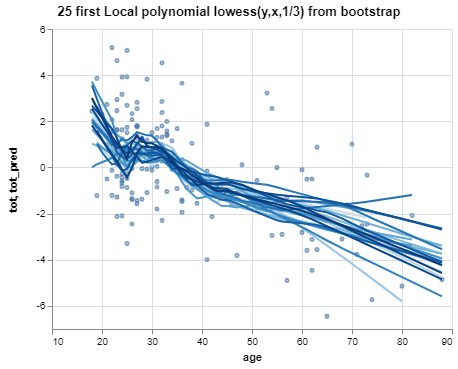

In [16]:
# filter the first 25 bootstraped lowess models
filter_data = kidney_lowess_model_bootstrap_df[(kidney_lowess_model_bootstrap_df.replication < 25)]

# curve plot that represents the lowess model
kidney_lowess_model_bootstrap_plot = alt.Chart(filter_data).mark_line().encode(
    x='age:Q', y='tot_pred:Q', color=alt.Color('replication:O', legend=None)
)

# dataset + model plots
plot = (kidney_df_plot + kidney_lowess_model_bootstrap_plot).properties(
    title="25 first Local polynomial lowess(y,x,1/3) from bootstrap"
)
plot

In [17]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

def calculate_bootstrap_SEs(bootstrap_data, ages=None):
    if ages is None:
        ages = bootstrap_data['age']
        ages = ages.drop_duplicates()
        ages = np.sort(ages)
    
    SEs = []
    for age in ages:
        filter_bootstrap_df = bootstrap_data[(bootstrap_data['age'] == age)]
        bs_std = bs.bootstrap(np.array(filter_bootstrap_df['tot_pred']), stat_func=bs_stats.std)
        SEs.append(bs_std.value)
        
    return SEs

In [18]:
kidney_lowess_model_tots_prev_some_ages = kidney_lowess_model_f(some_ages)

kidney_lowess_model_SEs = calculate_bootstrap_SEs(kidney_lowess_model_bootstrap_df, some_ages)

table_1_1 = pd.DataFrame({
    'ages':some_ages, 
    'linear reg. predic.':table_1_1['linear reg. predic.'],
    'linear reg. std error':table_1_1['linear reg. std error'],
    'lowess predic.':np.round(kidney_lowess_model_tots_prev_some_ages, decimals=2),
    'bootstrap std error':np.round(kidney_lowess_model_SEs, decimals=2)
})
table_1_1

,ages,linear reg. predic.,linear reg. std error,lowess predic.,bootstrap std error
0,20,1.29,0.21,1.66,0.62
1,30,0.50,0.15,0.65,0.24
2,40,-0.28,0.15,-0.59,0.33
3,50,-1.07,0.19,-1.27,0.34
4,60,-1.86,0.26,-1.91,0.34
5,70,-2.64,0.34,-2.68,0.44
6,80,-3.43,0.42,-3.50,0.64


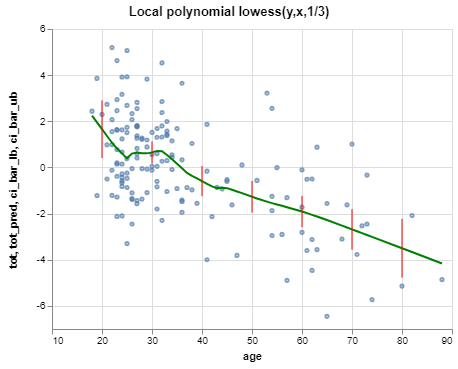

In [19]:
kidney_lowess_model_cis_bar_plot = make_CIs_bar_plot(
    some_ages, kidney_lowess_model_tots_prev_some_ages, kidney_lowess_model_SEs
)

# dataset + model + cis plots   
plot = (kidney_df_plot + kidney_lowess_model_plot + kidney_lowess_model_cis_bar_plot).properties(
    title=kidney_lowess_model_plot_title
)
plot

In [20]:
%%time

kidney_lowess_model_SEs = calculate_bootstrap_SEs(kidney_lowess_model_bootstrap_df, kidney_df['age'])

Wall time: 53.7 s


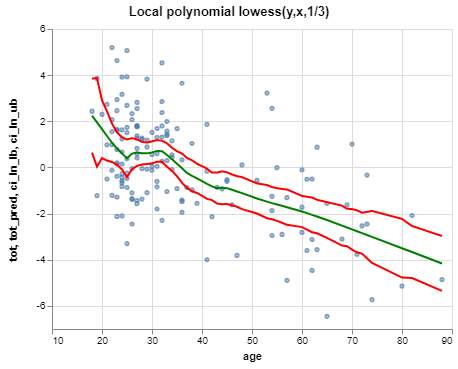

In [21]:
kidney_lowess_model_cis_line_plot = make_CIs_line_plot(
    kidney_df['age'], kidney_lowess_model_tots_prev, kidney_lowess_model_SEs
)

# dataset + model + cis plots   
plot = (kidney_df_plot + kidney_lowess_model_plot + kidney_lowess_model_cis_line_plot).properties(
    title=kidney_lowess_model_plot_title
)
plot

<!--NAVIGATION-->
| [Conteúdo](Index.ipynb) | [Frequentist Inference] >

<a href="https://colab.research.google.com/github/fmafonseca/casi/blob/master/notebooks/01.01.Algorithms-and-Inference.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>